# 🌍 Earthquake Focal Depth Prediction

## 📌 Introduction
This project aims to apply machine learning techniques to predict the **focal depth** of earthquakes based on geographic and magnitude-related features. We use the **Quakes** dataset, a real-world collection of seismic events, to build and evaluate regression models that help uncover patterns influencing earthquake depth.

## 🗂️ Dataset Description
The dataset originates from the book *Smoothing Methods in Statistics* by J.S. Simonoff (1996) and is publicly available on Kaggle. It contains information on seismic events with the following variables:

| Variable      | Description                                      |
|---------------|--------------------------------------------------|
| `latitude`    | Latitude of the earthquake epicenter             |
| `longitude`   | Longitude of the earthquake epicenter            |
| `richter`     | Earthquake magnitude on the Richter scale        |
| `focal_depth` | Depth of the earthquake focus (target variable)  |

- **File size**: ~44 KB  
- **Format**: CSV  
- **License**: CC0 (Public Domain)

## 🎯 Project Objective
Develop a predictive model to estimate the **focal depth** of earthquakes using:
- Latitude (`latitude`)
- Longitude (`longitude`)
- Magnitude (`richter`)



In [1]:
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
import numpy as np
import itertools

# Download latest version
path = kagglehub.dataset_download("mathurinache/quakes")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/quakes


In [2]:
df = pd.read_csv(path + "/dataset_2195_quake.csv")

# Quick overview
display(df.info())
display(df.describe())
display(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2178 entries, 0 to 2177
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   focal_depth  2178 non-null   int64  
 1   latitude     2178 non-null   float64
 2   longitude    2178 non-null   float64
 3   richter      2178 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 68.2 KB


None

,focal_depth,latitude,longitude,richter
count,2178.000000,2178.000000,2178.000000,2178.000000
mean,74.359963,7.961997,54.914835,5.977181
std,116.467797,30.545583,118.875581,0.189426
min,0.000000,-66.490000,-179.960000,5.800000
25%,21.000000,-12.432500,-67.782500,5.800000
50%,39.000000,0.210000,122.100000,5.900000
75%,68.000000,36.480000,146.860000,6.100000
max,656.000000,78.150000,180.000000,6.900000


,focal_depth,latitude,longitude,richter
0,33,-52.26,28.30,6.7
1,36,45.53,150.93,5.8
2,57,41.85,142.78,5.8
3,67,29.19,141.15,6.2
4,30,-21.66,169.81,6.0
...,...,...,...,...
2173,13,51.54,-173.11,5.8
2174,97,-10.16,161.01,5.9
2175,527,27.87,139.51,5.8
2176,51,36.43,140.98,6.0


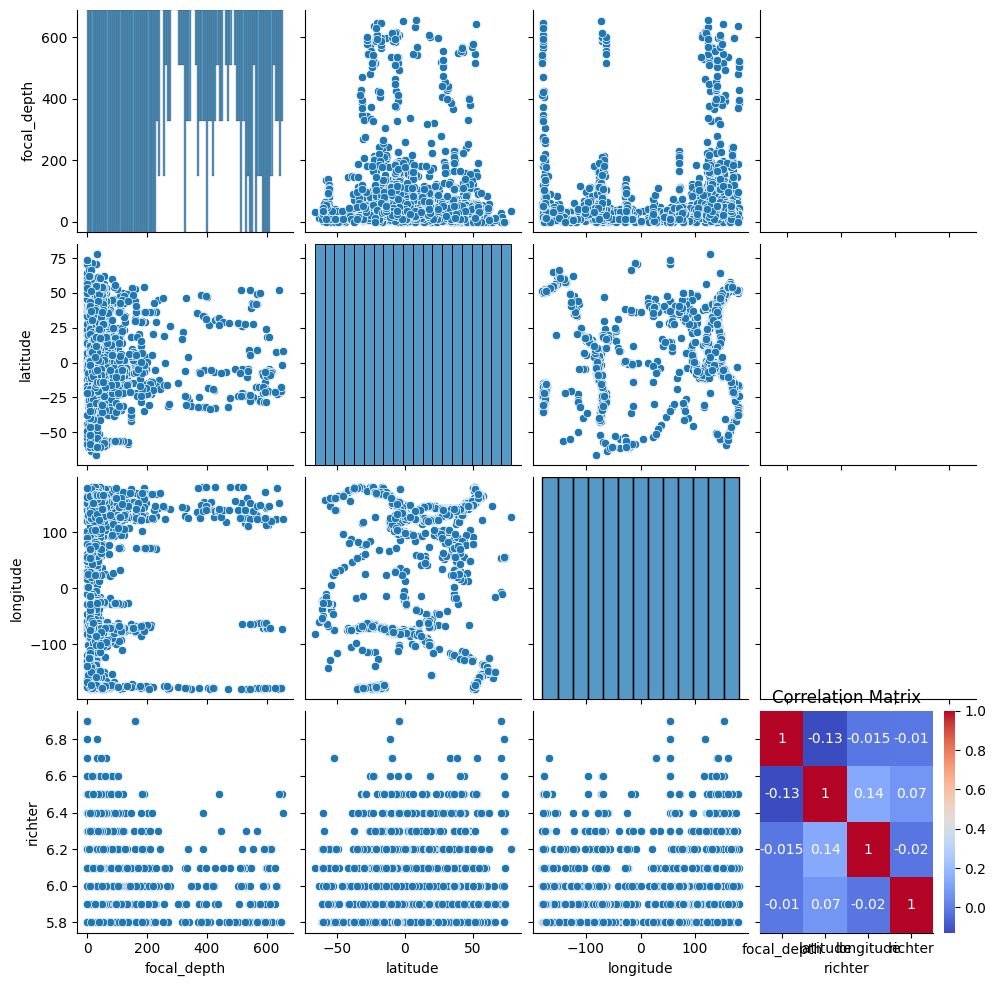

In [3]:
# Pairplot to visualize relationships
sns.pairplot(df)

# Correlation heatmap
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

## Why Use XGBoost for Focal Depth Prediction?

XGBoost (Extreme Gradient Boosting) is a high-performance machine learning algorithm that is particularly effective for structured data problems. In this project, we selected XGBoost to predict earthquake focal depth for several reasons:

### 1. Nonlinear Relationship Handling
The correlation matrix revealed very weak linear relationships between the input features (`latitude`, `longitude`, `richter`) and the target variable (`focal_depth`). This suggests that linear models would struggle to capture the underlying patterns. XGBoost, by contrast, builds an ensemble of decision trees that can model complex, nonlinear interactions between variables.

### 2. Automatic Feature Interaction
XGBoost can automatically learn interactions between features—such as how the combination of geographic location and magnitude might influence depth—without requiring manual feature engineering.

### 3. Regularization and Overfitting Control
The algorithm includes built-in L1 and L2 regularization, which helps prevent overfitting. This is especially important when working with a small number of features and a target variable with high variance and skew.

### 4. Scalability and Efficiency
XGBoost is optimized for speed and memory usage, making it suitable for large-scale experiments and hyperparameter tuning. Even when evaluating dozens of parameter combinations, training remains fast and efficient.

### 5. Interpretability
XGBoost provides feature importance scores, allowing us to understand which variables contribute most to the model’s predictions. This is valuable for both model refinement and scientific insight.

In [4]:
# Define features and target
X = df[['latitude', 'longitude', 'richter']]
y = df['focal_depth']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Initialize and train the model
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
xgb.fit(X_train, y_train)

# Predict on test set
y_pred_xgb = xgb.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred_xgb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print("XGBoost MAE:", mae)
print("XGBoost RMSE:", rmse)

XGBoost MAE: 49.92805862426758
XGBoost RMSE: 90.66802319278555


To assess whether these errors are acceptable, we compare them to the distribution of the target variable (`focal_depth`):

| Statistic         | Value     |
|------------------|-----------|
| Mean depth        | 74.36     |
| Median depth      | 39.00     |
| Standard deviation| 116.47    |
| Max depth         | 656.00    |

- The **MAE (49.93)** is **lower than the standard deviation**, indicating that the model performs better than a naive guess based on the mean.
- The **RMSE (90.67)** is also within a reasonable range, given the wide spread and skewed distribution of the data.
- Since the **median depth is only 39**, the model likely overestimates shallow events and underestimates deeper ones — a common issue when the target variable is skewed.

### ✅ Conclusion

The model performs reasonably well considering:
- Only three features (`latitude`, `longitude`, `richter`) are used.
- The target variable has high variance and a long tail.
- No temporal or tectonic context is included.

This model can serve as a solid baseline for further improvements.

It is necessary to find the best parameters for XGBOOST, in this case the laste version is provided, but the full range of values evaluated is:

* n_estimators = [100,350]
* learning_rates = [0.01,0.1]
* max_depths = [4,8]

In [6]:

n_estimators_list = np.linspace(300, 325, 5, dtype=int)
learning_rates = np.linspace(0.0325, 0.0775, 5)
max_depths = np.linspace(4, 8, 5, dtype=int)

print("n_estimators_list:", n_estimators_list)
print("learning_rates:", learning_rates)
print("max_depths:", max_depths)

# Track best model
best_rmse = float('inf')
best_params = None

# Iterate over all combinations
for n, lr, depth in itertools.product(n_estimators_list, learning_rates, max_depths):
    model = XGBRegressor(n_estimators=n, learning_rate=lr, max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    if rmse < best_rmse:
        best_rmse = rmse
        best_params = (n, lr, depth)

print("\n✅ Best configuration:")
print(f"n_estimators={best_params[0]}, learning_rate={best_params[1]}, max_depth={best_params[2]} → RMSE={best_rmse:.2f}")

n_estimators_list: [300 306 312 318 325]
learning_rates: [0.0325  0.04375 0.055   0.06625 0.0775 ]
max_depths: [4 5 6 7 8]

✅ Best configuration:
n_estimators=312, learning_rate=0.055, max_depth=6 → RMSE=77.58


In [7]:
# Initialize and train the model
xgb = XGBRegressor(n_estimators=312, learning_rate=0.055, max_depth=6, random_state=42)
xgb.fit(X_train, y_train)

# Predict on test set
y_pred_xgb = xgb.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred_xgb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print("XGBoost MAE:", mae)
print("XGBoost RMSE:", rmse)

XGBoost MAE: 41.607269287109375
XGBoost RMSE: 77.5753319613023


This represents a MAE and RMSE improvement of ~17% and ~14%

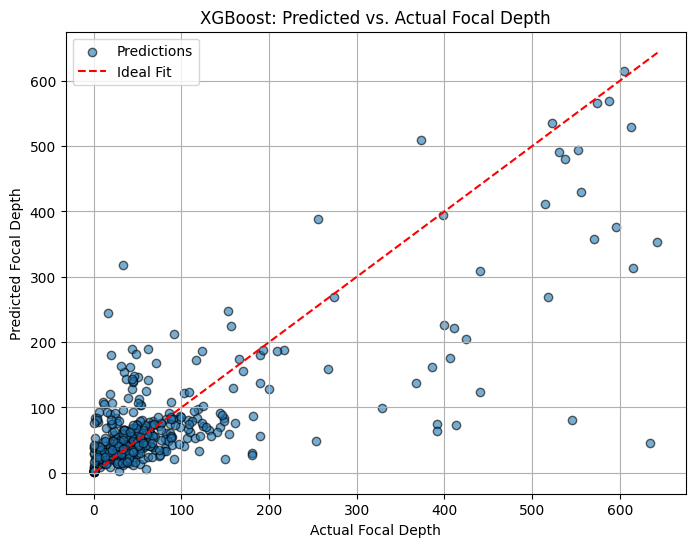

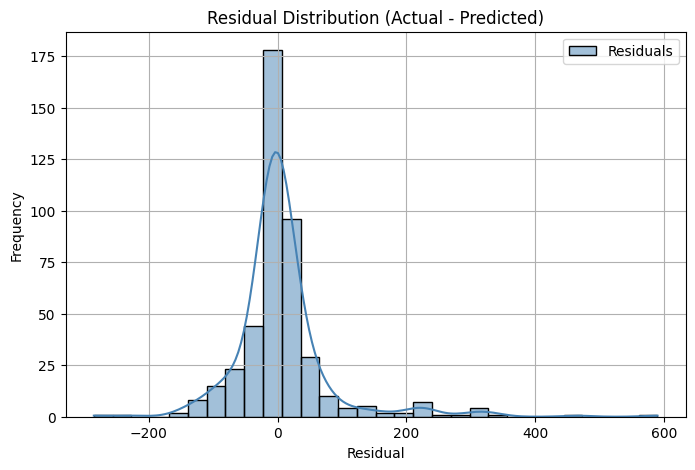

In [11]:
residuals = y_test - y_pred_xgb

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.6, edgecolor='k', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.xlabel("Actual Focal Depth")
plt.ylabel("Predicted Focal Depth")
plt.title("XGBoost: Predicted vs. Actual Focal Depth")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30, color='steelblue', label='Residuals')
plt.title("Residual Distribution (Actual - Predicted)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

## 📊 Visual Evaluation of XGBoost Model

### 1. Predicted vs. Actual Focal Depth

This scatter plot compares the model’s predictions to the actual focal depths. The red dashed line represents perfect predictions (i.e., predicted = actual).

- **Blue dots**: Model predictions
- **Red dashed line**: Ideal fit

Most predictions cluster near the diagonal, especially for depths under 200. However, the spread increases for deeper events, suggesting the model has more difficulty with extreme values.

---

### 2. Residual Distribution

This histogram shows the distribution of residuals (actual - predicted). A well-performing model should have residuals centered around zero.

- **Blue bars**: Frequency of residuals
- **Density curve**: Smoothed distribution

The distribution is slightly right-skewed, indicating a tendency to underpredict deeper events. Still, most errors are relatively small and symmetrically distributed.

---

These visualizations confirm that the model performs reasonably well, with most predictions close to the true values and no major systematic bias.

## Conclusion

This project explored the use of machine learning to predict earthquake focal depth using the Quakes dataset, which includes only three features: `latitude`, `longitude`, and `richter` magnitude. Given the weak linear correlations between these features and the target variable, we selected XGBoost for its ability to model nonlinear relationships and feature interactions.

After training a baseline model and performing hyperparameter tuning, we achieved the following:

- **Baseline XGBoost RMSE**: 90.67
- **Tuned XGBoost RMSE**: 77.58
- **Tuned XGBoost MAE**: 41.61
- **Best parameters**: `n_estimators = 312`, `learning_rate = 0.055`, `max_depth = 6`

These results represent a **~17% improvement in MAE** and a **~14% improvement in RMSE** over the baseline model.

Visual analysis of the predictions and residuals confirmed that:
- Most predictions are close to the actual values, especially for shallow and mid-range depths.
- The model tends to underpredict deeper events, which is expected given the skewed distribution of the target variable.
- Residuals are mostly centered around zero, with a slight right skew.

Despite the limited feature set and lack of temporal or tectonic context, the model performs reasonably well and serves as a strong baseline for future improvements. Potential next steps include incorporating additional geophysical data, applying log transformations to reduce skew, or reframing the problem as a classification task using depth bins.
